In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load data
df = pd.read_csv("./data/GSE205450_norm.csv", index_col=0)

# Example: sample labels in separate list (same order as columns)
#group_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 #               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  #              0, 0, 0, 0]  # Modify based on your real setup
group_labels = [0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1]
# Convert to numpy array
expr = df.values
group_labels = np.array(group_labels)

# Split data
case_expr = expr[:, group_labels == 1]
control_expr = expr[:, group_labels == 0]


In [5]:
# Log2 fold change
log2fc = np.log2(np.mean(case_expr, axis=1) + 1) - np.log2(np.mean(control_expr, axis=1) + 1)

# p-values using independent t-test
pvals = ttest_ind(case_expr, control_expr, axis=1, equal_var=False).pvalue

# Adjust p-values using Benjamini-Hochberg (FDR)
from statsmodels.stats.multitest import multipletests
_, padj, _, _ = multipletests(pvals, method='fdr_bh')

# Combine into dataframe
de_df = pd.DataFrame({
    'Gene': df.index,
    'log2FoldChange': log2fc,
    'pvalue': pvals,
    'padj': padj
})

# Filter top 20 by adjusted p-value
top20 = de_df.sort_values("padj").head(20)
print(top20)


                 Gene  log2FoldChange        pvalue          padj
20030         disease        1.000000  0.000000e+00  0.000000e+00
18085      Gene_56261       -0.162180  1.042215e-15  1.043831e-11
16732       Gene_1153       -0.092293  3.329610e-12  2.223181e-08
12960       Gene_8660        0.072860  4.774408e-12  2.390904e-08
15082  Gene_107984827        0.380390  9.192674e-12  2.728471e-08
1185   Gene_112268238        0.233379  1.084279e-11  2.728471e-08
18378      Gene_23613        0.054112  1.225912e-11  2.728471e-08
18181  Gene_100134868        0.095481  1.160343e-11  2.728471e-08
4402         Gene_604        0.121884  7.797602e-12  2.728471e-08
15780       Gene_8557        0.181357  1.647619e-11  3.300346e-08
5378        Gene_3157       -0.086731  3.470868e-11  6.320451e-08
18450       Gene_1908       -0.274337  3.790106e-11  6.326635e-08
19481       Gene_5935       -0.118525  4.338891e-11  6.685564e-08
11612      Gene_29068        0.039298  6.601373e-11  9.445151e-08
17547     

c:\Users\ADMIN\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [2]:
df.head()

,GeneId,GSM6212891,GSM6212892,GSM6212893,GSM6212894,GSM6212895,GSM6212899,GSM6212903,GSM6212905,GSM6212907,...,GSM6213031,GSM6213032,GSM6213033,GSM6213034,GSM6213035,GSM6213036,GSM6213037,GSM6213038,GSM6213039,GSM6213040
0,Gene_653635,2.586407,2.775508,2.611647,2.670708,2.681511,2.627500,2.400484,2.504083,2.557567,...,2.579194,2.667738,2.643193,2.693298,2.534405,2.530295,2.563171,2.503672,2.500740,2.453444
1,Gene_102466751,1.038165,1.556029,1.400944,1.396522,1.118401,1.000121,0.806244,0.976036,1.201471,...,1.466326,1.158518,1.383234,1.391954,1.155564,1.219947,1.319248,1.030682,1.235356,1.334208
2,Gene_100996442,1.609319,1.673392,1.766502,1.540372,1.638184,1.447288,1.549384,1.542236,1.528737,...,1.605554,1.480691,1.688271,1.610534,1.708412,1.701365,1.717751,1.781565,1.709260,1.663095
3,Gene_729737,1.831133,2.206833,2.193440,2.061289,1.745103,2.084573,2.104648,1.601305,1.842313,...,1.812245,2.138267,2.059435,2.044093,1.984532,2.088604,2.225866,2.109233,2.058245,1.871246
4,Gene_102723897,2.454343,2.611533,2.689758,2.675718,2.777141,2.611613,2.399317,2.545771,2.623316,...,2.587551,2.583942,2.749247,2.790410,2.400529,2.415777,2.488915,2.408571,2.615221,2.565517


Unique labels in y: [0 1]


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e-03, tolerance: 2.727e-04
  model = cd_fast.enet_coordinate_descent(


LASSO selected features: [ 1811  2278  4394  7308  7436  8599  9580  9871 12597 13566 17894]
Ridge selected features: [    0     1     2 ... 18342 18343 18344]
Logistic Regression Accuracy: 1.0000
SVM Accuracy: 1.0000
Decision Tree Accuracy: 0.8000
Random Forest Accuracy: 1.0000
Naive Bayes Accuracy: 0.6000
K-Nearest Neighbor Accuracy: 0.8000


<Figure size 640x480 with 0 Axes>

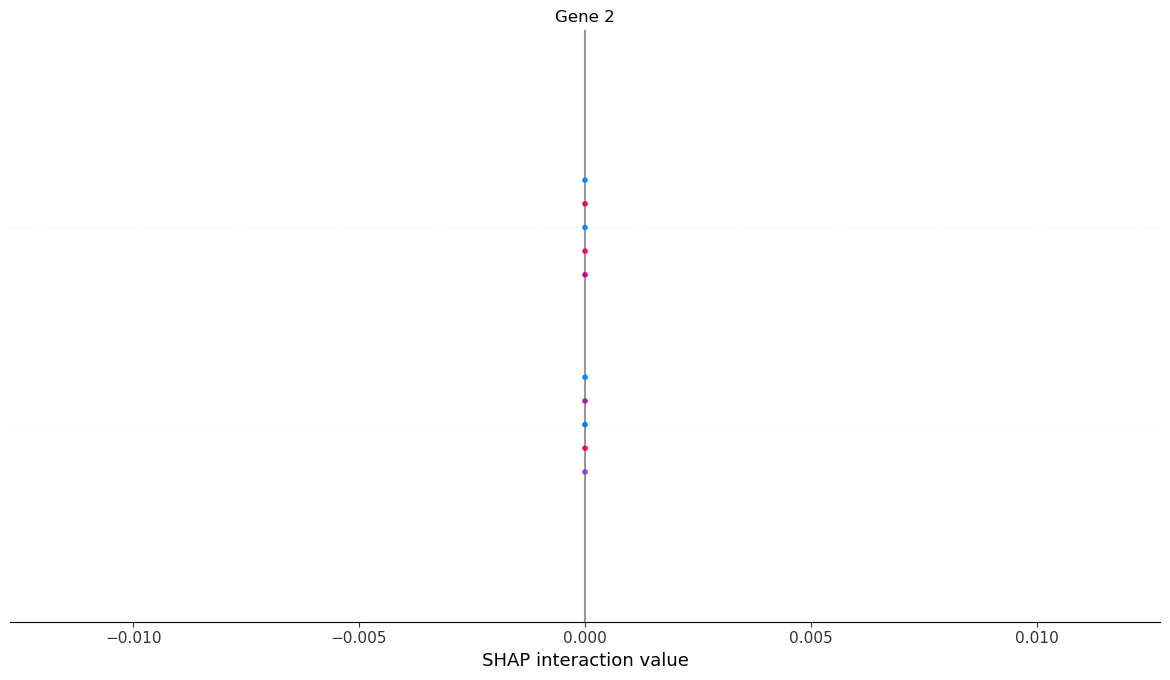

<Figure size 640x480 with 0 Axes>

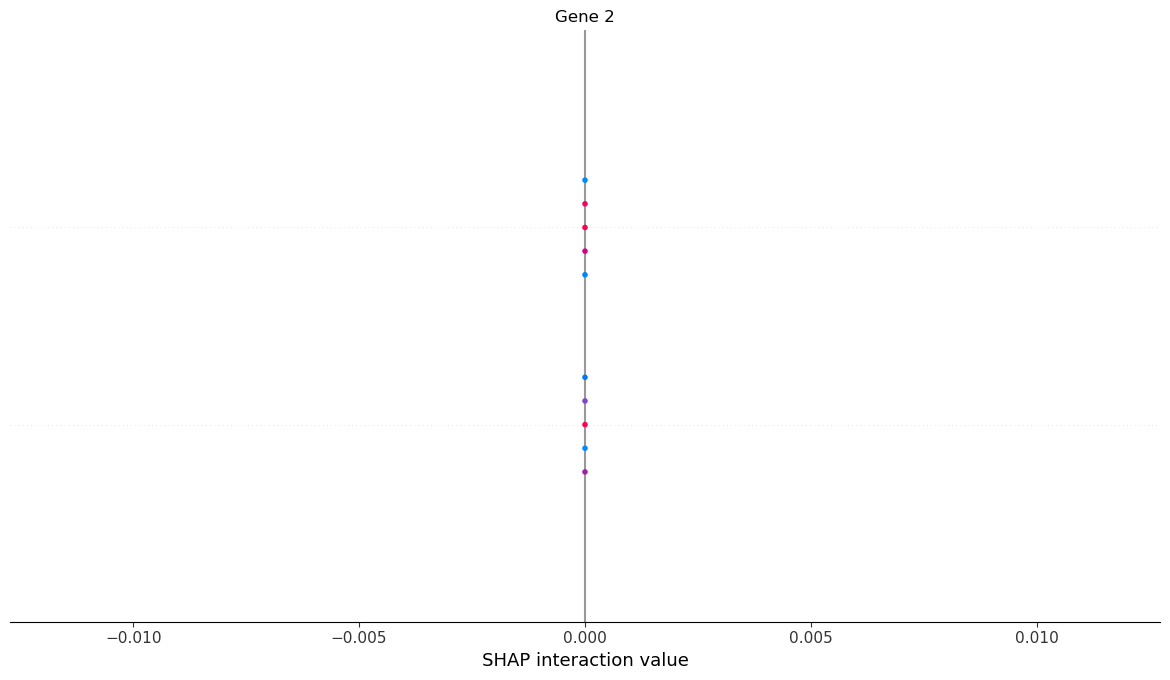

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

# Load your dataset
# Assuming the file is a CSV and you have the structure as described.
# Example: pd.read_csv('your_dataset.csv')

# For demonstration, we'll load a dataset named 'gene_expression.csv'
# The first column should contain gene IDs, and the last row contains the control labels (0/1)
df = pd.read_csv('./data/GSE106608_norm.csv')

# Extract gene IDs (first column) and expression data (excluding gene IDs and labels)
gene_ids = df.iloc[:, 0].values  # Gene IDs (first column)
X = df.iloc[:-1, 1:].values  # Gene expression data (all rows except last)
y = df.iloc[-1, 1:].values  # Control labels (last row, skipping the first column)

# Ensure that the labels are integers (0 and 1)
y = y.astype(int)

# Check if the labels are correctly assigned
print(f"Unique labels in y: {np.unique(y)}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=42)  # Transpose X to have samples as rows

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using LASSO and Ridge regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_selected_features = np.where(lasso.coef_ != 0)[0]

ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, y_train)
ridge_selected_features = np.where(ridge.coef_ != 0)[0]

print(f"LASSO selected features: {lasso_selected_features}")
print(f"Ridge selected features: {ridge_selected_features}")

# Perform classification using different models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbor": KNeighborsClassifier()
}

# Store accuracy for each model
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Using SHAP to interpret the Random Forest model (TreeExplainer is efficient for tree-based models)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Use TreeExplainer for Random Forest (efficient for tree-based models)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=[f'Gene {i+1}' for i in range(X_train_scaled.shape[1])])

# For large datasets, use batch processing to avoid memory issues
batch_size = 50  # Adjust based on available memory
num_batches = X_test_scaled.shape[0] // batch_size

shap_values_batch = []

# Process the test set in batches
for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch = X_test_scaled[batch_start:batch_end]
    
    # Append SHAP values for the batch
    shap_values_batch.append(explainer.shap_values(batch))

# If there are remaining samples, process them as well
if X_test_scaled.shape[0] % batch_size != 0:
    batch_start = num_batches * batch_size
    batch_end = X_test_scaled.shape[0]
    batch = X_test_scaled[batch_start:batch_end]
    
    shap_values_batch.append(explainer.shap_values(batch))

# Combine the SHAP values from all batches
shap_values_combined = np.concatenate(shap_values_batch, axis=0)

# Plot SHAP summary for the entire dataset
shap.summary_plot(shap_values_combined, X_test_scaled, feature_names=[f'Gene {i+1}' for i in range(X_train_scaled.shape[1])])
plt.show()


Unique labels in y: [0 1]
Training and evaluating Logistic Regression with LASSO-selected features...
Training and evaluating SVM with LASSO-selected features...
Training and evaluating Decision Tree with LASSO-selected features...
Training and evaluating Random Forest with LASSO-selected features...
Training and evaluating Naive Bayes with LASSO-selected features...
Training and evaluating KNN with LASSO-selected features...


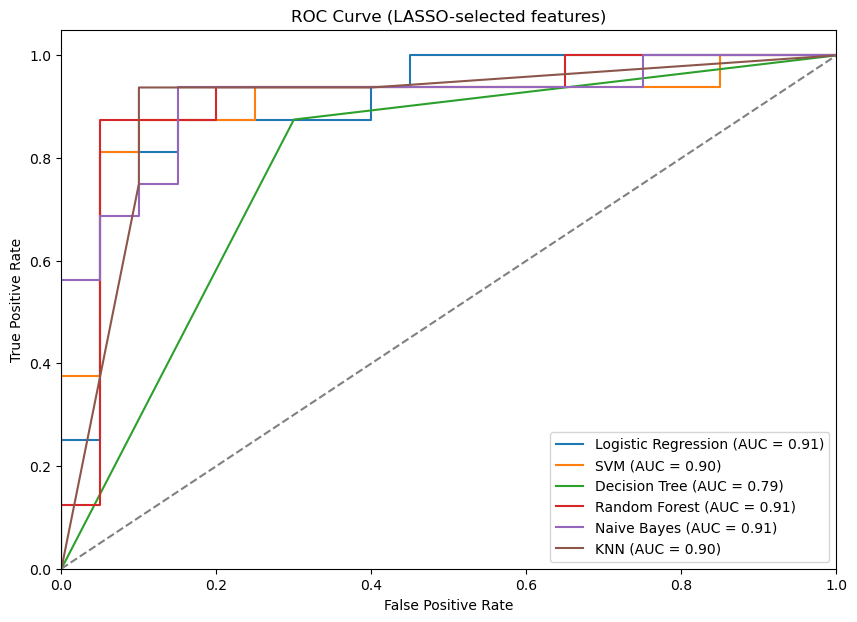

Training and evaluating Logistic Regression with Ridge-selected features...
Training and evaluating SVM with Ridge-selected features...
Training and evaluating Decision Tree with Ridge-selected features...
Training and evaluating Random Forest with Ridge-selected features...
Training and evaluating Naive Bayes with Ridge-selected features...
Training and evaluating KNN with Ridge-selected features...


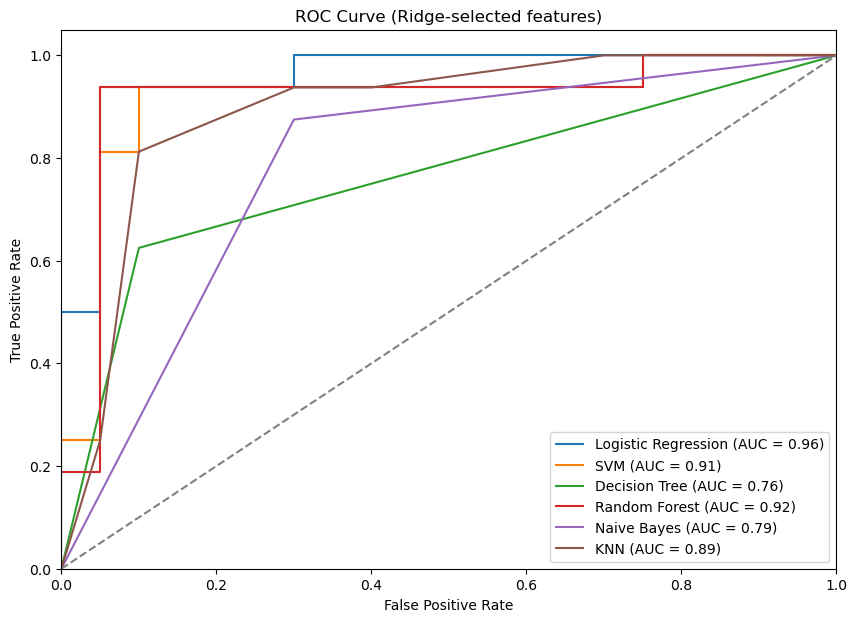


Classification Report for Logistic Regression (LASSO-selected features):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.87      0.81      0.84        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


Classification Report for Logistic Regression (Ridge-selected features):
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.94      0.91        16

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Load your actual dataset
data = './data/GSE205450_norm.csv'  # Corrected file extension

# Read the CSV data
df = pd.read_csv(data)

# Extract gene IDs (first column) and expression data (excluding gene IDs and labels)
gene_ids = df.iloc[:, 0].values  # Gene IDs (first column)
X = df.iloc[:-1, 1:].values.T  # Transpose to get samples as rows
y = df.iloc[-1, 1:].values  # Control labels (last row, skipping the first column)

# Ensure that the labels are integers (0 and 1)
y = y.astype(int)

# Check if the labels are correctly assigned
print(f"Unique labels in y: {np.unique(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_selected_features = np.abs(lasso.coef_) > 0
X_train_lasso = X_train_scaled[:, lasso_selected_features]
X_test_lasso = X_test_scaled[:, lasso_selected_features]

# Feature selection using Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_selected_features = np.abs(ridge.coef_) > 0
X_train_ridge = X_train_scaled[:, ridge_selected_features]
X_test_ridge = X_test_scaled[:, ridge_selected_features]

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate classifiers on LASSO-selected features
plt.figure(figsize=(10, 7))
for name, clf in classifiers.items():
    print(f"Training and evaluating {name} with LASSO-selected features...")
    clf.fit(X_train_lasso, y_train)
    y_pred_prob = clf.predict_proba(X_test_lasso)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings for ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LASSO-selected features)')
plt.legend(loc='lower right')
plt.show()

# Train and evaluate classifiers on Ridge-selected features
plt.figure(figsize=(10, 7))
for name, clf in classifiers.items():
    print(f"Training and evaluating {name} with Ridge-selected features...")
    clf.fit(X_train_ridge, y_train)
    y_pred_prob = clf.predict_proba(X_test_ridge)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ridge-selected features)')
plt.legend(loc='lower right')
plt.show()

# Classification report for Logistic Regression with LASSO features
lasso_log_reg = LogisticRegression()
lasso_log_reg.fit(X_train_lasso, y_train)
y_pred_lasso = lasso_log_reg.predict(X_test_lasso)
print("\nClassification Report for Logistic Regression (LASSO-selected features):")
print(classification_report(y_test, y_pred_lasso))

# Classification report for Logistic Regression with Ridge features
ridge_log_reg = LogisticRegression()
ridge_log_reg.fit(X_train_ridge, y_train)
y_pred_ridge = ridge_log_reg.predict(X_test_ridge)
print("\nClassification Report for Logistic Regression (Ridge-selected features):")
print(classification_report(y_test, y_pred_ridge))



=== Cross-Validation using LASSO-Selected Features ===

Logistic Regression:
Accuracy: 0.88 (+/- 0.04)
AUC: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        59
           1       0.90      0.87      0.88        60

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119


SVM:
Accuracy: 0.87 (+/- 0.04)
AUC: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        59
           1       0.89      0.85      0.87        60

    accuracy                           0.87       119
   macro avg       0.87      0.87      0.87       119
weighted avg       0.87      0.87      0.87       119


Decision Tree:
Accuracy: 0.78 (+/- 0.03)
AUC: 0.77
Classification Report:
              precision    recall  f1-score   support

           0  

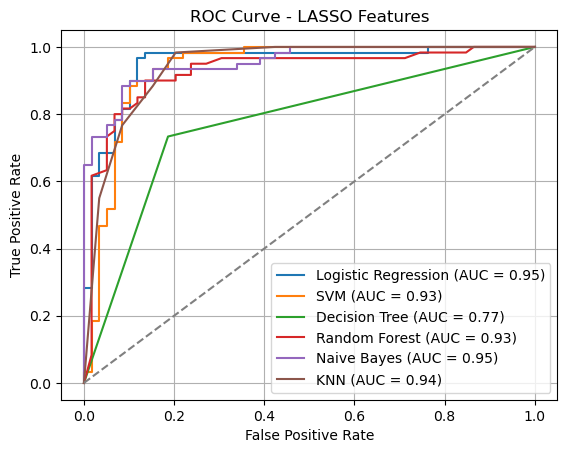


=== Cross-Validation using Ridge-Selected Features ===

Logistic Regression:
Accuracy: 0.84 (+/- 0.06)
AUC: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        59
           1       0.85      0.83      0.84        60

    accuracy                           0.84       119
   macro avg       0.84      0.84      0.84       119
weighted avg       0.84      0.84      0.84       119


SVM:
Accuracy: 0.79 (+/- 0.04)
AUC: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        59
           1       0.81      0.77      0.79        60

    accuracy                           0.79       119
   macro avg       0.79      0.79      0.79       119
weighted avg       0.79      0.79      0.79       119


Decision Tree:
Accuracy: 0.66 (+/- 0.15)
AUC: 0.69
Classification Report:
              precision    recall  f1-score   support

           0  

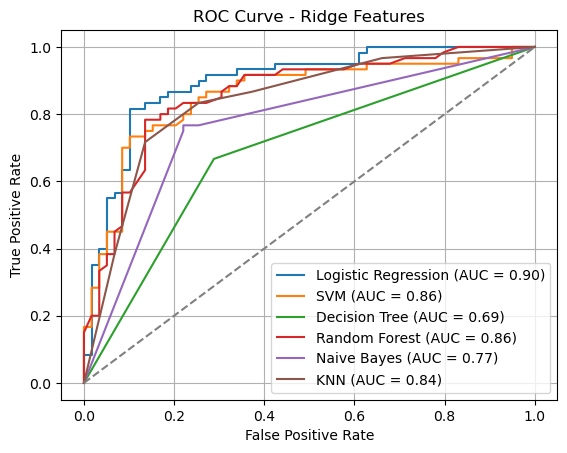

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report

# Load data
data = './data/GSE205450_norm.csv'
df = pd.read_csv(data)

# Extract gene IDs and expression matrix
gene_ids = df.iloc[:, 0].values
X = df.iloc[:-1, 1:].values.astype(float)  # exclude last row (labels), keep as float
y = df.iloc[-1, 1:].values.astype(int)     # last row = labels

# Transpose: now rows = samples, columns = features (genes)
X = X.T

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)
lasso_mask = np.abs(lasso.coef_) > 0
X_lasso = X_scaled[:, lasso_mask]

# Feature selection using Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
ridge_mask = np.abs(ridge.coef_) > 0
X_ridge = X_scaled[:, ridge_mask]

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Cross-validation and ROC for LASSO-selected features ---
print("\n=== Cross-Validation using LASSO-Selected Features ===")
for name, clf in classifiers.items():
    print(f"\n{name}:")
    
    y_proba = cross_val_predict(clf, X_lasso, y, cv=cv, method='predict_proba')[:, 1]
    y_pred = cross_val_predict(clf, X_lasso, y, cv=cv)
    scores = cross_val_score(clf, X_lasso, y, cv=cv)
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    print(f"AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LASSO Features')
plt.legend()
plt.grid()
plt.show()

# --- Cross-validation and ROC for Ridge-selected features ---
print("\n=== Cross-Validation using Ridge-Selected Features ===")
for name, clf in classifiers.items():
    print(f"\n{name}:")

    y_proba = cross_val_predict(clf, X_ridge, y, cv=cv, method='predict_proba')[:, 1]
    y_pred = cross_val_predict(clf, X_ridge, y, cv=cv)
    scores = cross_val_score(clf, X_ridge, y, cv=cv)
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    print(f"AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ridge Features')
plt.legend()
plt.grid()
plt.show()


In [16]:
# List top Lasso-selected features (non-zero coefficients)
lasso_gene_names = np.array(gene_ids[:-1])[lasso_mask]  # exclude the 'disease' row
lasso_coeffs = lasso.coef_[lasso_mask]
top_lasso = sorted(zip(lasso_gene_names, lasso_coeffs), key=lambda x: abs(x[1]), reverse=True)

print("\nTop LASSO-selected Genes:")
for gene, coef in top_lasso[:20]:  # Show top 20 genes
    print(f"{gene}: Coefficient = {coef:.4f}")

# List top Ridge-selected features (based on absolute value of coefficients)
ridge_gene_names = np.array(gene_ids[:-1])[ridge_mask]
ridge_coeffs = ridge.coef_[ridge_mask]
top_ridge = sorted(zip(ridge_gene_names, ridge_coeffs), key=lambda x: abs(x[1]), reverse=True)

print("\nTop Ridge-selected Genes:")
for gene, coef in top_ridge[:20]:  # Show top 20 genes
    print(f"{gene}: Coefficient = {coef:.4f}")



Top LASSO-selected Genes:
Gene_56261: Coefficient = -0.0895
Gene_100134868: Coefficient = 0.0812
Gene_10964: Coefficient = -0.0361
Gene_29068: Coefficient = 0.0336
Gene_3040: Coefficient = -0.0326
Gene_107986454: Coefficient = -0.0258
Gene_55353: Coefficient = -0.0246
Gene_285: Coefficient = 0.0235
Gene_51129: Coefficient = 0.0209
Gene_5379: Coefficient = -0.0123
Gene_22982: Coefficient = 0.0061
Gene_84467: Coefficient = -0.0018
Gene_2537: Coefficient = -0.0009

Top Ridge-selected Genes:
Gene_6007: Coefficient = -0.0023
Gene_55066: Coefficient = 0.0023
Gene_100134868: Coefficient = 0.0020
Gene_161823: Coefficient = -0.0020
Gene_100132288: Coefficient = -0.0020
Gene_23421: Coefficient = -0.0019
Gene_102724951: Coefficient = 0.0019
Gene_102724843: Coefficient = 0.0019
Gene_100288798: Coefficient = -0.0019
Gene_6231: Coefficient = 0.0019
Gene_389831: Coefficient = 0.0018
Gene_548644: Coefficient = -0.0018
Gene_387628: Coefficient = -0.0018
Gene_102724604: Coefficient = 0.0018
Gene_199720